<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [23]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import requests
from bs4 import BeautifulSoup

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = pd.DataFrame(columns={"Language","Avg Annual Salary"})
for row in soup.find_all('tr'):
    cols = row.find_all('td')
    lan = cols[1].getText()
    sal = cols[3].getText()
    table = table.append({"Language":lan,"Avg Annual Salary":sal},ignore_index=True)

In [6]:
table.head()

,Avg Annual Salary,Language
0,Average Annual Salary,Language
1,"$114,383",Python
2,"$101,013",Java
3,"$92,037",R
4,"$110,981",Javascript


In [7]:
df = table.drop(0)

In [8]:
df['Average Annual Salary'] = df['Avg Annual Salary']

In [9]:
df

,Avg Annual Salary,Language,Average Annual Salary
1,"$114,383",Python,"$114,383"
2,"$101,013",Java,"$101,013"
3,"$92,037",R,"$92,037"
4,"$110,981",Javascript,"$110,981"
5,"$130,801",Swift,"$130,801"
6,"$113,865",C++,"$113,865"
7,"$88,726",C#,"$88,726"
8,"$84,727",PHP,"$84,727"
9,"$84,793",SQL,"$84,793"
10,"$94,082",Go,"$94,082"


In [10]:
df.drop('Avg Annual Salary',axis=1,inplace=True)

In [11]:
df

,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


Save the scrapped data into a file named *popular-languages.csv*


In [12]:
# your code goes here
df.to_csv("popular-language.csv")

<h2>Loading new csv</h2>

In [63]:
df_new = pd.read_csv("popular-language-1.csv")

In [64]:
df_new.head()

,Unnamed: 0,Language,Average Annual Salary
0,1,Python,114383.0
1,2,Java,101013.0
2,3,R,92037.0
3,4,Javascript,110981.0
4,5,Swift,130801.0


In [65]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10 non-null     int64  
 1   Language               10 non-null     object 
 2   Average Annual Salary  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [67]:
df_new.drop('Unnamed: 0',axis=1,inplace=True)

In [68]:
df_new

,Language,Average Annual Salary
0,Python,114383.0
1,Java,101013.0
2,R,92037.0
3,Javascript,110981.0
4,Swift,130801.0
5,C++,113865.0
6,C#,88726.0
7,PHP,84727.0
8,SQL,84793.0
9,Go,94082.0


In [71]:
df_new.sort_values('Average Annual Salary',ascending=False,inplace=True)

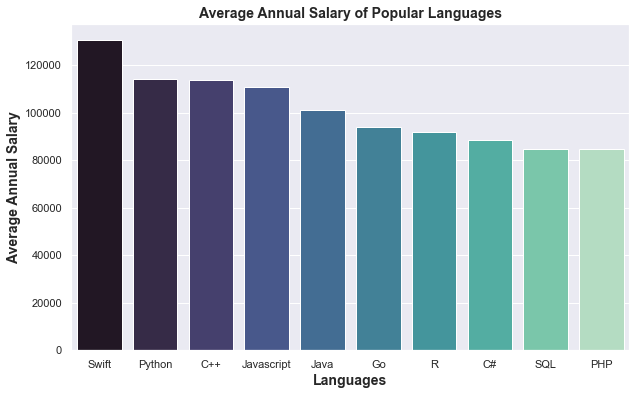

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_new['Language'],y=df_new['Average Annual Salary'],data=df_new,palette='mako')
plt.title("Average Annual Salary of Popular Languages",fontsize=14,weight='bold')
plt.xlabel('Languages',fontsize=14,weight='bold')
plt.ylabel('Average Annual Salary',fontsize=14,weight='bold')
plt.savefig("bar.png",dpi=400)
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
